In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def gillespie_algoritm(alpha,beta, gamma, sigma, x0, t_end):
  x= x0
  t= 0.0
  times = [t]
  population = [x]

  while t< t_end:
    rates = [alpha*x, beta*x, gamma, sigma*(x*(x-1))/2]
    #if rates are negative change to zero
    rates = [max(rate,0) for rate in rates]
    total = sum(rates)

    if total == 0.0:
      break
    dt = np.random.exponential(scale = 1/ total)
    t = t+dt

    prob = [rate/total for rate in rates]
    our_case = np.random.choice(range(4), p= prob)

    if(our_case == 0):
      x = x + 1
    elif(our_case == 1):
      x = x - 1
    elif(our_case == 3):
      x = x - 2

    times.append(t)
    population.append(x)

  return times, population

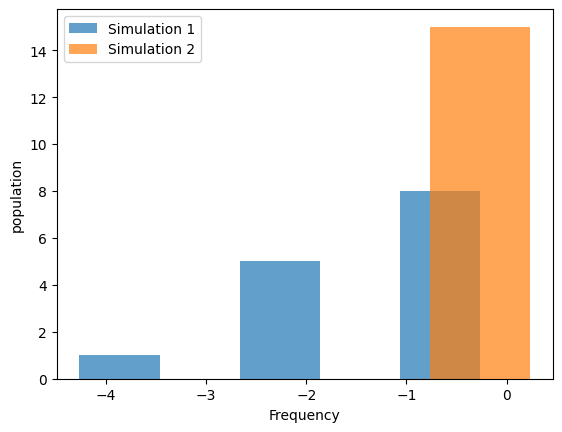

In [9]:
import math
alpha1 = 1
beta1 = 0.1
gamma1 = 0.8
sigma1 = 0.2

#second simulation
alpha2 = 1
beta2 = 0.1
gamma2 = 1.5
sigma2 = 0.02
in_sqrt = (2 * alpha1 - 2 * beta1 + 5)**2 - 4 * (-3) * sigma1 * 2 * alpha1 - 2 * sigma1
x0 = (2 * beta1 - 2 * alpha1 - 5 + math.sqrt(in_sqrt)) / (2 * (-3) * sigma1)
t_end = 10
#simulating with the first group of parameters
times1 , population1 = gillespie_algoritm(alpha1,beta1, gamma1, sigma1, x0, t_end)

#simulating with thw first group of parameters
times2 , population2 = gillespie_algoritm(alpha2,beta2, gamma2, sigma2, x0, t_end)

#plot histogram
plt.hist(population1, bins = 'auto', alpha=0.7, label='Simulation 1' )
plt.hist(population2, bins = 'auto', alpha=0.7, label='Simulation 2' )
plt.ylabel('population')
plt.xlabel('Frequency')
plt.legend()
plt.show()